In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

In [2]:
df = pd.read_csv('readings1.csv')

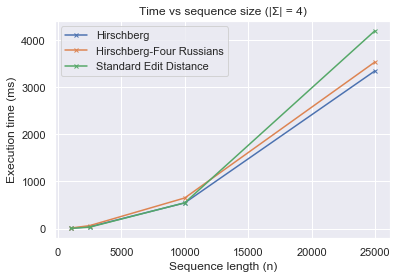

In [3]:
# Plot time vs n for different s
s = [2, 3, 4]
for si in s:
    df2 = df[df.s == si]
    plt.clf()
    plt.plot(df2.n, df2.hirschtime, marker='x', markersize=4, label='Hirschberg')
    plt.plot(df2.n, df2.rustime, marker='x', markersize=4, label='Hirschberg-Four Russians')
    plt.plot(df2.n, df2.edittime,marker='x', markersize=4, label='Standard Edit Distance')
    plt.legend(loc='best')
    plt.title("Time vs sequence size (|Σ| = {})".format(si))
    plt.xlabel('Sequence length (n)')
    plt.ylabel('Execution time (ms)')
    plt.savefig('time-vs-size-{}.png'.format(si), bbox_inches='tight')

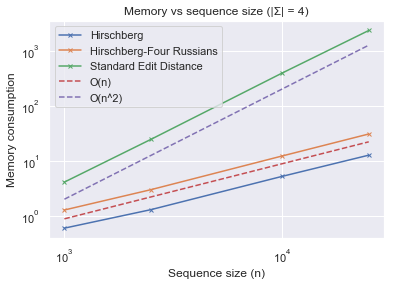

In [67]:
# Plot time vs n for different s
s = [2, 3, 4]
for si in s:
    df2 = df[df.s == si]
    plt.clf()
    plt.loglog(df2.n, df2.hirschmem, marker='x', markersize=4, label='Hirschberg')
    plt.loglog(df2.n, df2.rusmem - df2.cachesize, marker='x', markersize=4, label='Hirschberg-Four Russians')
    plt.loglog(df2.n, df2.editmem, marker='x', markersize=4, label='Standard Edit Distance')
    
    c1 = np.mean([np.mean((df2.rusmem - df2.cachesize)/ df.n), np.mean(df2.hirschmem / df.n)])
    plt.loglog([df2.n.min(), df2.n.max()], [df2.n.min() * c1, df2.n.max() * c1], '--', label='O(n)')
    
    c2 = np.mean(df2.editmem / (df.n ** 2)) / 1.95 # Offset it a little
    plt.loglog([df2.n.min(), df2.n.max()], [(df2.n.min() ** 2) * c2, (df2.n.max() ** 2) * c2], '--', 
               label='O(n^2)')
    plt.legend(loc='best')
    plt.title("Memory vs sequence size (|Σ| = {})".format(si))
    plt.savefig('memory-vs-size-{}.png'.format(si), bbox_inches='tight')
    plt.xlabel('Sequence size (n)')
    plt.ylabel('Memory consumption')

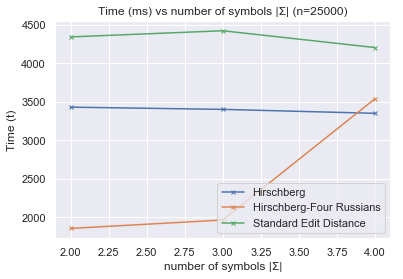

In [4]:
df2 = df[df.n == 25000]
plt.clf()
plt.plot(df2.s, df2.hirschtime, marker='x', markersize=4, label='Hirschberg')
plt.plot(df2.s, df2.rustime,marker='x', markersize=4,  label='Hirschberg-Four Russians')
plt.plot(df2.s, df2.edittime, marker='x', markersize=4, label='Standard Edit Distance')
plt.legend(loc='best')
plt.title("Time (ms) vs number of symbols |Σ| (n=25000)".format(si))
plt.xlabel('number of symbols |Σ|')
plt.ylabel('Time (t)')
plt.savefig('time-vs-symbols.png', bbox_inches='tight')

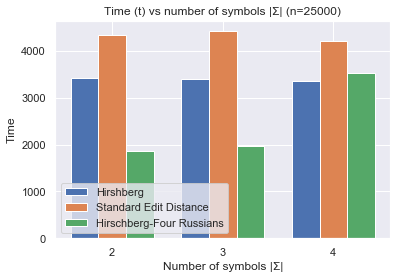

In [40]:
index = np.arange(len(df2.s))
bar_width = 0.25
plt.clf()
plt.bar(index, df2.hirschtime, bar_width, label='Hirshberg')
plt.bar(index + bar_width, df2.edittime, bar_width, label='Standard Edit Distance')
plt.bar(index + 2 * bar_width, df2.rustime, bar_width, label='Hirschberg-Four Russians')
plt.xlabel('Number of symbols |Σ|')
plt.ylabel('Time')
plt.title('Time (t) vs number of symbols |Σ| (n=25000)')
plt.xticks(index + bar_width, df2.s)
plt.legend(loc=3)
plt.savefig('time-vs-symbols-bar.png', bbox_inches='tight')

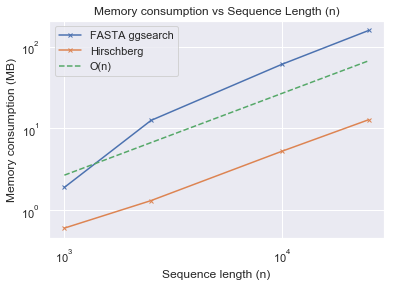

In [93]:
df2 = df[df.s == 4]
plt.clf()
plt.plot(df2.n, df2.fastatime, marker='x', markersize=4, label='FASTA ggsearch')
plt.plot(df2.n, df2.hirschtime,marker='x', markersize=4,  label='Hirschberg')
plt.legend(loc='best')
plt.title("Time (t) vs Sequence Length (n)".format(si))
plt.xlabel('Sequence length (n)')
plt.ylabel('Execution Time (t)')
plt.ylim(bottom=0)
plt.savefig('fasta-time.png', bbox_inches='tight')

# Speedup
df2 = df[df.s == 4]
plt.clf()
plt.loglog(df2.n, df2.fastamem, marker='x', markersize=4, label='FASTA ggsearch')
plt.loglog(df2.n, df2.hirschmem, marker='x', markersize=4,  label='Hirschberg')
c1 = np.mean([df2.hirschmem / df2.n, df2.fastamem / df2.n])
plt.loglog([df2.n.min(), df2.n.max()], [df2.n.min() * c1, df2.n.max() * c1], '--', label='O(n)')

plt.legend(loc='best')
plt.title("Memory consumption vs Sequence Length (n)".format(si))
plt.xlabel('Sequence length (n)')
plt.ylabel('Memory consumption (MB)')
plt.savefig('fasta-mem.png', bbox_inches='tight')

In [89]:
df2 = df[df.s == 4]
np.polyfit(np.log(df2.n), np.log(df2.hirschmem), 1)

array([ 0.95630444, -7.15195654])